## The Maze Stumbler: Example Code

Written in `Jupyter Notebook` using `Python 2.7`.

### Prep

In [1]:
# This code uses a numpy array to represent the maze and pyplot for making figures
import numpy as np
import matplotlib.pyplot as plt

### Loading a Maze

In [2]:
# Note: Since there are only two types of 'blocks' in the maze (wall or corridor),
#       the Boolean data type (False or True) is well-suited to represent it.
path = r'maze_small_0.txt'
maze = np.loadtxt(path, dtype=np.bool, delimiter=',')
print maze.shape

(51L, 51L)


### Displaying the Maze

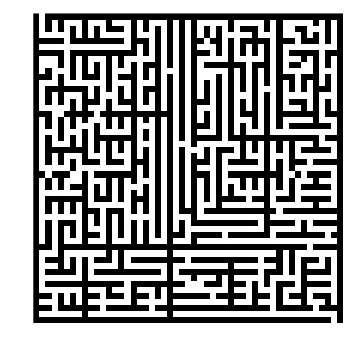

In [3]:
# This is just one way of doing it.
plt.imshow(maze, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

### Stumbling Teresa

This is a very simple implementation of the "maze walker" Teresa. Here, she simply moves in a random direction at every step. If that direction happens to be a wall, she stops and tries again. With this approach, she will *eventually* get to the exit, but it will take a long time, especially for larger mazes...

Can you improve Teresa's algorithm?

In [4]:
# Teresa's initial position is at the entrance (top left)
# Note: the position is given as (y,x), where y counts from the 
#       top left downward and x from the top left rightward.
teresa = (0,1)

In [5]:
# Define a function that updates Teresa's position
def update_position(position, maze):
    
    # Randomly decide one of the four directions
    directions = [(-1,0),(1,0),(0,-1),(0,1)]
    move = directions[np.random.randint(0,4)]
    
    # Just in case Teresa is still standing at the entrance, 
    # prevent her from moving back out of the maze
    if position == (0,1) and move[0] == -1:
        move = (0,0)
        
    # Check if there is a wall in the direction of movement
    if maze[position[0]+move[0], position[1]+move[1]] == 0:
        move = (0,0)
        
    # Apply the movement to the position
    new_position = (position[0]+move[0], position[1]+move[1])
    
    # Return the updated position
    return new_position

In [6]:
# Loop through updates of the position
exit_found = False
all_positions = [teresa]
while not exit_found:
    
    # Update
    teresa = update_position(teresa, maze)
    
    # Keep track of the movement
    all_positions.append(teresa)
    
    # Check if the exit was found
    if teresa == (-1,-2):
        print "I've found the exit!"
        exit_found = True
        
    # After 100000 steps, give up
    if len(all_positions) == 100000:
        print "I'm tired - I give up!"
        break

I'm tired - I give up!


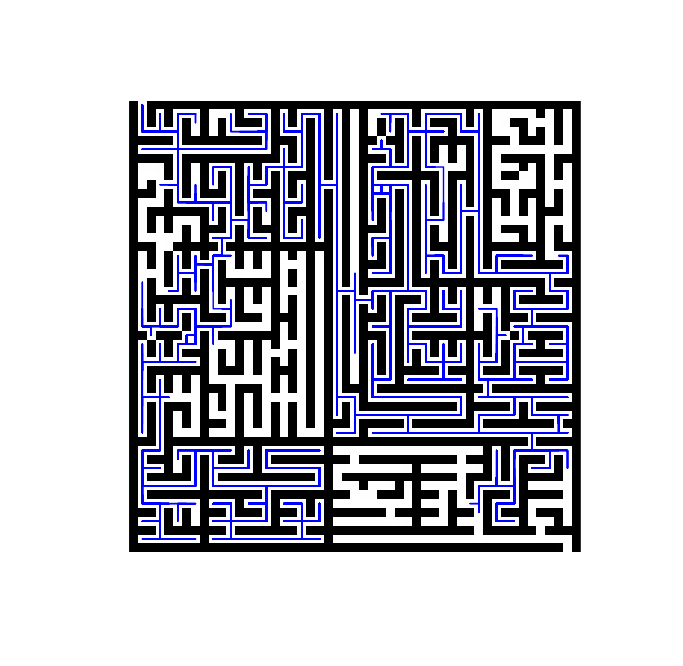

In [7]:
# Show the explored area
plt.figure(figsize=(8,8))                               # Set the figure size
plt.imshow(maze, cmap='gray', interpolation='none')     # Show the maze
plt.plot([position[1] for position in all_positions],   # Plot the path
         [position[0] for position in all_positions])
plt.axis('off')                                         # Switch off the axes
plt.show()                                              # Show the figure